In [76]:
from biasbalancer.balancer import BiasBalancer
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick


In [120]:
#using 10x predictions for each person (notice person id and variables reoccur every 300th row). This will implicitly give a mean score, which is a proxy for doing proper uncertainty measures, which were left out due to it not being the focus of this assignment as well as time constraints.
fair = pd.read_csv('data/fair_NN_independence_out.csv')
fair

,person_id,credit_score,nn_pred,nn_prob,account_amount,duration,credit_history,credit_purpose,credit_amount,savings_amount,...,age,installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,personal_status,sex
0,0,1.0,True,0.702845,0,18.0,2,4,3190.0,0,...,24.0,2,1,0,2,0,0,0,0,0
1,1,0.0,False,0.365052,0,18.0,2,0,4380.0,1,...,35.0,2,1,0,1,1,1,0,1,1
2,2,0.0,True,0.798250,0,24.0,1,0,2325.0,1,...,32.0,0,1,0,2,0,0,0,1,1
3,3,0.0,False,0.277905,2,12.0,2,4,1297.0,0,...,23.0,2,0,0,2,0,0,0,0,1
4,4,0.0,False,0.196113,3,33.0,4,1,7253.0,0,...,35.0,2,1,1,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,295,0.0,False,0.132320,3,33.0,3,9,2764.0,0,...,26.0,2,1,1,2,0,1,0,0,0
8996,296,1.0,False,0.280989,1,30.0,3,4,1919.0,1,...,30.0,1,1,1,3,0,0,0,1,1
8997,297,0.0,False,0.053483,3,9.0,2,3,1313.0,0,...,20.0,2,1,0,2,0,0,0,1,1
8998,298,0.0,True,0.741047,1,36.0,2,1,6948.0,0,...,35.0,2,0,0,3,0,1,0,1,1


In [56]:
unfair = pd.read_csv('data/NN_independence_out.csv')
unfair

,person_id,credit_score,nn_pred,nn_prob,account_amount,duration,credit_history,credit_purpose,credit_amount,savings_amount,...,age,installment_plans,housing,existing_credits,job,dependents,telephone,foreign_worker,personal_status,sex
0,0,1.0,True,0.921101,0,18.0,2,4,3190.0,0,...,24.0,2,1,0,2,0,0,0,0,0
1,1,0.0,True,0.731883,0,18.0,2,0,4380.0,1,...,35.0,2,1,0,1,1,1,0,1,1
2,2,0.0,True,0.947677,0,24.0,1,0,2325.0,1,...,32.0,0,1,0,2,0,0,0,1,1
3,3,0.0,False,0.154889,2,12.0,2,4,1297.0,0,...,23.0,2,0,0,2,0,0,0,0,1
4,4,0.0,False,0.376237,3,33.0,4,1,7253.0,0,...,35.0,2,1,1,3,0,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,295,0.0,False,0.104473,3,33.0,3,9,2764.0,0,...,26.0,2,1,1,2,0,1,0,0,0
8996,296,1.0,False,0.256593,1,30.0,3,4,1919.0,1,...,30.0,1,1,1,3,0,0,0,1,1
8997,297,0.0,False,0.124532,3,9.0,2,3,1313.0,0,...,20.0,2,1,0,2,0,0,0,1,1
8998,298,0.0,False,0.346227,1,36.0,2,1,6948.0,0,...,35.0,2,0,0,3,0,1,0,1,1


The sensitive variable upon which independence has been enforced/ not enforced during training time is "personal_status". This is a binary variable where:
- 0 = "married/previously married"
- 1 = "single"

There is also another potential sensitive variable: "sex", which has not had a fairness criteria enforced upon it. Sex has the categories:
- 0 = Woman
- 1 = Man

In [64]:
print(sum(unfair["nn_pred"]==unfair["credit_score"])/len(unfair))
print(sum(fair["nn_pred"]==fair["credit_score"])/len(fair))

0.7522222222222222
0.7296666666666667


Accuracy is slightly higher for the unfair NN as expected

## Fairness criteria: Independence

 $$\frac{PP_a}{N_a} = \frac{PP_b}{N_b}$$

In [65]:
fairPP_single = fair["nn_pred"][fair["personal_status"] == 1]
fairPP_married = fair["nn_pred"][fair["personal_status"] == 0]

print(sum(fairPP_single)/len(fairPP_single))
print(sum(fairPP_married)/len(fairPP_married))

independence_fair = (fairPP_married.mean()/fairPP_single.mean())
print(independence_fair)

0.21206543967280164
0.21654501216545013
1.021123538562248


In [66]:
unfairPP_single = unfair["nn_pred"][unfair["personal_status"] == 1]
unfairPP_married = unfair["nn_pred"][unfair["personal_status"] == 0]

print(sum(unfairPP_single)/len(unfairPP_single))
print(sum(unfairPP_married)/len(unfairPP_married))

independence_unfair = (unfairPP_married.mean()/unfairPP_single.mean())
print(independence_unfair)

0.16748466257668712
0.1929440389294404
1.1520101958058162


C:\Users\rune7\AppData\Local\Temp\ipykernel_21448\265509153.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


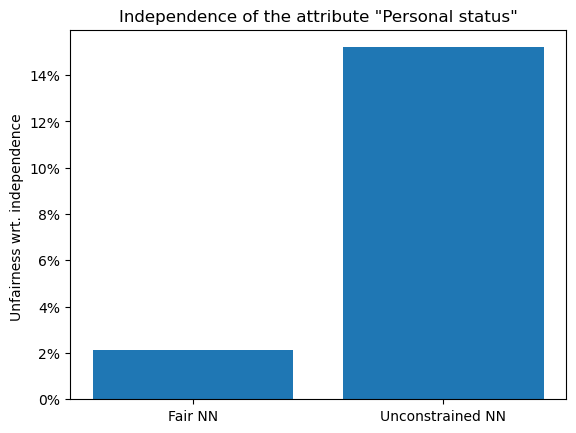

In [85]:
plt.bar([0,1],[independence_fair-1,independence_unfair-1])
plt.title("Independence of the attribute \"Personal status\"")
plt.xticks(np.arange(2),["Fair NN", "Unconstrained NN"])
plt.ylabel("Unfairness wrt. independence ")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.show()

Firstly, we see that more married/previously married people get predicted as worthy of credit by both NN's. However, the difference is very small for the Fair NN.

As such, enforcing independence on the neural network seemingly has had the desired effect. However, this result has not been statistically verified and can therefore not be trusted. Statistically verifying this result could be done by placing more emphasis on reproducibility in the NN architecture (besides simple test/train split seed as has been done) and by conducting e.g. a McNemar test to check whether the difference between the two classifiers is significant.

It is worth noting that the NN created for this purpose has an option for scaling how much any independence unfairness should count towards the loss. Testing whether increasing/decreasing this scalar leads to a further reduction in fairness/accuracy would be interesting, but would also entail placing more emphasis on statistical tests, which is outside the chosen scope of this project.

## Fairness criteria: Separation
$$FPR_a = FPR_b$ and $FNR_a = FNR_b$$
The FPR and FNR are exactly inversely related since the target variable y is binary. As such, we can focus on FPR alone.

We now check whether enforcing independence has had any adverse effects on other fariness criteria. In this case we look at separation.

In [93]:
fairFP_married = fair["nn_pred"][fair["personal_status"] == 0][fair["credit_score"]==0]
fairFPR_married = sum(fairFP_married)/len(fairFP_married)

fairFP_single = fair["nn_pred"][fair["personal_status"] == 1][fair["credit_score"]==0]
fairFPR_single = sum(fairFP_single)/len(fairFP_single)

print(fairFPR_married)
print(fairFPR_single)

separation_fair = fairFPR_single/fairFPR_married
print(separation_fair)

0.12307692307692308
0.13531073446327685
1.0993997175141244


In [95]:
unfairFP_married = unfair["nn_pred"][unfair["personal_status"] == 0][unfair["credit_score"]==0]
unfairFPR_married = sum(unfairFP_married)/len(unfairFP_married)

unfairFP_single = unfair["nn_pred"][unfair["personal_status"] == 1][unfair["credit_score"]==0]
unfairFPR_single = sum(unfairFP_single)/len(unfairFP_single)

print(unfairFPR_married)
print(unfairFPR_single)

separation_unfair = unfairFPR_single/unfairFPR_married
print(separation_unfair)

0.09816849816849817
0.08135593220338982
0.8287376675942322


C:\Users\rune7\AppData\Local\Temp\ipykernel_21448\704826502.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


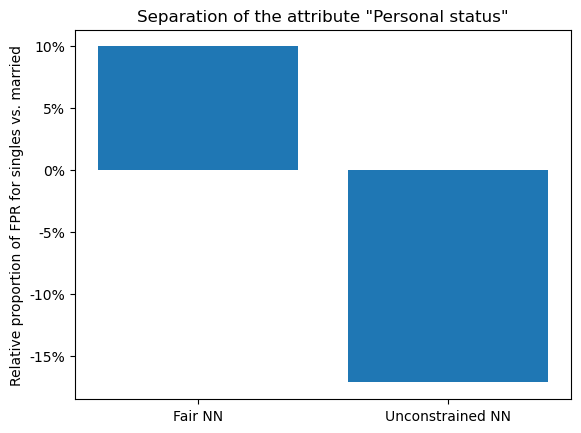

In [97]:
plt.bar([0,1],[separation_fair-1,separation_unfair-1])
plt.title("Separation of the attribute \"Personal status\"")
plt.xticks(np.arange(2),["Fair NN", "Unconstrained NN"])
plt.ylabel("Relative proportion of FPR for singles vs. married")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.show()

Here we see that enforcing independence does not lead to separation being satisfied. The singles have a higher rate of false positives than the married people in the independence-optimized NN, whereas it is the opposite for the unconstrained NN.

Again, the results are not verified to be significant and can therefore not be trusted. However, we can conclude that a network which is relatively fair wrt. independence on a given sensitive variable is not necessarily fair wrt. separation on the same variable.

## Checking for adverse unfairness on other features

Finally, we will check whether enforcing independence has positive or adverse effects on fairness wrt. "sex" as a sensitive attribute.

In [98]:
fairPP_single = fair["nn_pred"][fair["sex"] == 1]
fairPP_married = fair["nn_pred"][fair["sex"] == 0]

print(sum(fairPP_single)/len(fairPP_single))
print(sum(fairPP_married)/len(fairPP_married))

independence_fair = (fairPP_married.mean()/fairPP_single.mean())
print(independence_fair)

0.21147798742138366
0.22045454545454546
1.0424467725582967


In [100]:
unfairPP_single = unfair["nn_pred"][unfair["sex"] == 1]
unfairPP_married = unfair["nn_pred"][unfair["sex"] == 0]

print(sum(unfairPP_single)/len(unfairPP_single))
print(sum(unfairPP_married)/len(unfairPP_married))

independence_unfair = (unfairPP_married.mean()/unfairPP_single.mean())
print(independence_unfair)

0.16981132075471697
0.2015151515151515
1.1867003367003368


C:\Users\rune7\AppData\Local\Temp\ipykernel_21448\2993688107.py:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])


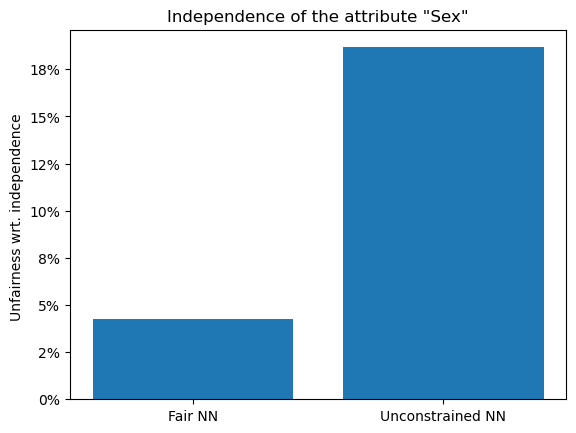

In [102]:
plt.bar([0,1],[independence_fair-1,independence_unfair-1])
plt.title("Independence of the attribute \"Sex\"")
plt.xticks(np.arange(2),["Fair NN", "Unconstrained NN"])
plt.ylabel("Unfairness wrt. independence ")
plt.gca().set_yticklabels([f'{x:.0%}' for x in plt.gca().get_yticks()])
plt.show()

Here we see that the NN optimized wrt. independence of "Personal status" also is more fair wrt. "Sex". This might suggest that "Sex" and "Personal status" are correlated. This is actually the case:

In [117]:
singles = fair["personal_status"][fair["personal_status"] == 1]
single_men = fair[(fair["personal_status"] == 1) & (fair["sex"] ==1)]

print(len(singles)/len(single_men))

1.0


I subsequently checked the utilized dataset, which is the dataset prepocessed by the BiasBalancer team, and found that indeed every person that is "single" in the dataset is also "male". This suggests that an error was made in the preprocessing.